<div class='heading'>
    <div style='float:left;'><h1>CPSC 4300/6300: Applied Data Science</h1></div>
    <img style="float: right; padding-right: 10px; width: 65px" src="https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/images/clemson_paw.png"> </div>


## Week 7: Frequent Itemset Mining & Rule Association

**Clemson University**<br>
**Spring 2022**<br>
**Instructor(s):** Nina Hubig <br>
**Author(s):** Chris Kalahiki

---

In [1]:
""" RUN THIS CELL TO GET THE RIGHT FORMATTING """
import requests
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/bsethwalker/clemson-cs4300/main/css/cpsc6300.css'
styles = requests.get(css_file).text
HTML(styles)

**Warning: In addition to the packages that we have used up to this point, we will also be using the mlxtend package for some frequent itemset mining functionality. Be sure to install this package before continuing.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from pandas.plotting import parallel_coordinates

%matplotlib inline 

## Learning Goals

By the end of this lab, you should be able to:
- Understand the Apriori algorithm
- Make use of the mlxtend package to mine frequent itemset sets
- Create a couple new visualizations that show the results of frequent itemset mining

### About Aprior Algorithm 

* Inventation 
> This algorithm, introduced by R Agrawal and R Srikant in 1994 has great significance in data mining. We shall see the importance of the apriori algorithm in data mining in this article
* Brief Introduction with Examples 
This small story will help you understand the concept better. You must have noticed that the local vegetable seller always bundles onions and potatoes together. He even offers a discount to people who buy these bundles.

**Why does he do so?** 

He realises that people who buy potatoes also buy onions. Therefore, by bunching them together, he makes it easy for the customers. At the same time, he also increases his sales performance. It also allows him to offer discounts.Similarly, you go to a supermarket, and you will find bread, butter, and jam bundled together. It is evident that the idea is to make it comfortable for the customer to buy these three food items in the same place.


The Walmart beer diaper parable is another example of this phenomenon. People who buy diapers tend to buy beer as well. The logic is that raising kids is a stressful job. People take beer to relieve stress. Walmart saw a spurt in the sale of both diapers and beer.

* What is the Apriori Algorithm? 

**Apriori algorithm, a classic algorithm, is useful in mining frequent itemsets and relevant association rules. Usually, you operate this algorithm on a database containing a large number of transactions. One such example is the items customers buy at a supermarket.**

It helps the customers buy their items with ease, and enhances the sales performance of the departmental store.

This algorithm has utility in the field of healthcare as it can help in detecting adverse drug reactions (ADR) by producing association rules to indicate the combination of medications and patient characteristics that could lead to ADRs

* Apriori Algorithm – An Odd Name
It has got this odd name because it uses ‘prior’ knowledge of frequent itemset properties. The credit for introducing this algorithm goes to Rakesh Agrawal and Ramakrishnan Srikant in 1994. We shall now explore the apriori algorithm implementation in detail.

In [3]:
# loads and displays our data
data = pd.read_csv("data/groceries - groceries.csv")
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's start by trying to visualize the data.

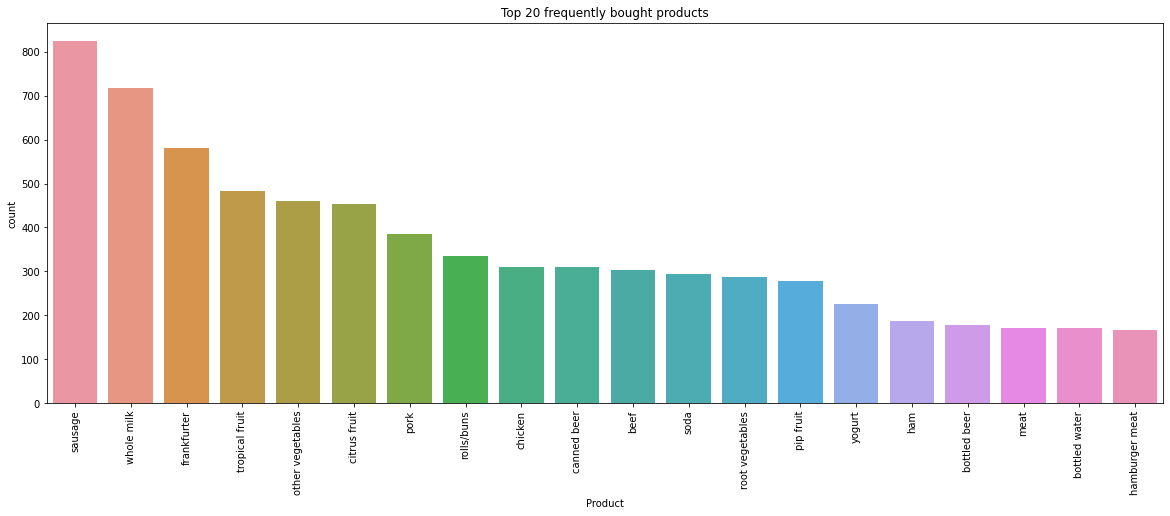

In [4]:
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=data, x=data['Item 1'], order=data['Item 1'].value_counts().head(20).index)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

Let's create a list of transactions.

In [5]:
records = []
for i in range(0, len(data)):
    records.append([str(data.values[i,j]) for j in range(1, data.values[i, 0]+1)])

Let's analyze the no. of items wrt each transaction.

In [6]:
counts = [len(record) for record in records]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 3.0 only
particular transaction having a maximum of 32 items in it


Now we will create a one-hot encoder to use going forward.

In [7]:
te = TransactionEncoder()
onehot = te.fit_transform(records)
onehot = pd.DataFrame(onehot, columns = te.columns_)

print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 169 columns


Due to complexity we are reducing the number of items by selecting particular items alone.

In [8]:
onehot = onehot.loc[:, ['bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'syrup',
                    'sweet spreads', 'beverages', 'berries', 'beef', 'bathroom cleaner', 'baking powder', 'bags',
                    'baby food', 'baby cosmetics', 'Instant food products', 'tea', 'toilet cleaner', 'vinegar', 'waffles', 'whisky',
                    'white bread', 'white wine', 'yogurt', 'zwieback', 'whole milk', 'whipped/sour cream', 'abrasive cleaner']]

print(f'Shape of encoded data: {onehot.shape[0]} rows and {onehot.shape[1]} columns')

Shape of encoded data: 9835 rows and 28 columns


### How does the Apriori Algorithm in Data Mining work?

* Consider a supermarket scenario where the itemset is I = {Onion, Burger, Potato, Milk, Beer}. The database consists of six transactions where 1 represents the presence of the item and 0 the absence.

![](https://www.digitalvidya.com/wp-content/uploads/2018/11/01.jpg)

#### Step -01 
Create a frequency table of all the items that occur in all the transactions. Now, prune the frequency table to include only those items having a threshold support level over 50%. We arrive at this frequency table.

* All subsets of a frequent itemset should be frequent.
* In the same way, the subsets of an infrequent itemset should be infrequent.
* Set a threshold support level. In our case, we shall fix it at 50%

![](https://www.digitalvidya.com/wp-content/uploads/2018/11/02.jpg)

#### Step -02 

* Make pairs of items such as OP, OB, OM, PB, PM, BM. This frequency table is what you arrive at.

![](https://www.digitalvidya.com/wp-content/uploads/2018/11/03.jpg)

#### Step -03
Apply the same threshold support of 50% and consider the items that exceed 50% (in this case 3 and above).
Thus, you are left with OP, OB, PB, and PM
#### Step -04
Step 4
Look for a set of three items that the customers buy together. Thus we get this combination.
* OP and OB gives OPB
* PB and PM gives PBM
#### Step -05

![](https://www.digitalvidya.com/wp-content/uploads/2018/11/04.jpg)
*  Determine the frequency of these two itemsets. You get this frequency table.If you apply the threshold assumption, you can deduce    that the set of three items frequently purchased by the customers is OPB.
* We have taken a simple example to explain the apriori algorithm in data mining. In reality, you have hundreds and thousands of such combinations.


Let's generate the frequent itemset using apriori with minimum support of 0.01% and maximum item per transaction restricted to 3.

In [9]:

frequent_itemsets=apriori(onehot, min_support=0.0001, use_colnames=True, max_len=3)
frequent_itemsets

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.004169,(brandy)
3,0.064870,(brown bread)
4,0.055414,(butter)
...,...,...
1006,0.010880,"(whole milk, yogurt, whipped/sour cream)"
1007,0.000712,"(whole milk, yogurt, abrasive cleaner)"
1008,0.000102,"(abrasive cleaner, whipped/sour cream, yogurt)"
1009,0.000203,"(whole milk, zwieback, whipped/sour cream)"



### Detailed Theory 

**Three significant components comprise the apriori algorithm. They are as follows.**

* Support
* Confidence
* Lift

**This example will make things easy to understand. Let us suppose you have 2000 customer transactions in a supermarket. You have to find the Support, Confidence, and Lift for two items, say bread and jam. It is because people frequently bundle these two items together.**
Out of the 2000 transactions, 200 contain jam whereas 300 contain bread. These 300 transactions include a 100 that includes bread as well as jam. Using this data, we shall find out the support, confidence, and lift.
#### SUPPORT 
Support is the default popularity of any item. You calculate the Support as a quotient of the division of the number of transactions containing that item by the total number of transactions. Hence, in our example,

* Support (Jam) = (Transactions involving jam) / (Total Transactions)

                       *  = 200/2000 = 10%
#### Confidence 
It is the likelihood that customer bought both bread and jam. Dividing the number of transactions that include both bread and jam by the total number of transactions will give the Confidence figure.

* Confidence = (Transactions involving both bread and jam) / (Total Transactions involving jam)

                    = 100/200 = 50%                      
                       
  * It implies that 50% of customers who bought jam bought bread as well
  
####  Lift
**According to our example, Lift is the increase in the ratio of the sale of bread when you sell jam. The mathematical formula of Lift is as follows.**

* Lift = (Confidence (Jam͢͢ – Bread)) / (Support (Jam))

      = 50 / 10 = 5
It says that the likelihood of a customer buying both jam and bread together is 5 times more than the chance of purchasing jam alone. If the Lift value is less than 1, it entails that the customers are unlikely to buy both the items together. Greater the value, the better is the combination.

Next, we will generate association rules with mlxtend's association_rules function.

In [10]:
rules=association_rules(frequent_itemsets)
rules.shape

(164, 9)

Now we can try pruning the generated rules using multiple filters.

In [30]:
targeted_rules = rules[rules['antecedents'] == {'baby food'}].copy()

<div class="exercise"><b>Exercise #1</b>: </div>

Using the targeted_rules DataFrame above, filter the rules to retain only those rules that meet both of the following criteria:
- Rules with a confidence greater than 0.85
- Rules with a lift greater than 1.00

In [31]:
# %load solutions/exercise1-solution.py
filtered_rules = targeted_rules[(targeted_rules['confidence'] > 0.85) & (targeted_rules['lift'] > 1.00)]

From here, we can take a look at the 'baby foods' relevant consequents. To do this, we will use a [`pivot table`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) using pandas. From there, we will use seaborn's [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize the results.

<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

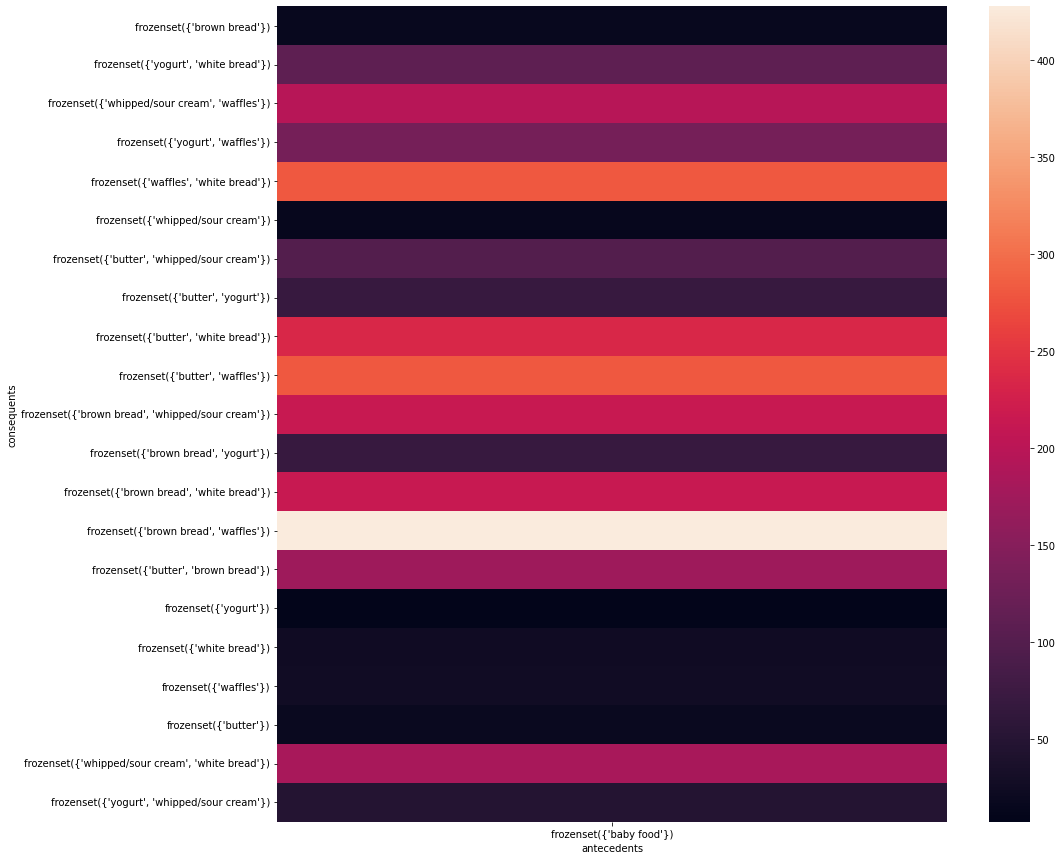

In [32]:
plt.rcParams['figure.figsize'] = (15, 15)
support_table = filtered_rules.pivot(index='consequents', columns='antecedents', values='lift')
sns.heatmap(support_table)

In [33]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index
coords = rules[['antecedent','consequent','rule']]

Now, we can generate a parallel coordinate plot to visualize the association rules.

<div class="exercise"><b>Exercise #2</b>: </div>

Visualize the association rules using a [`parallel coordinate`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html) plot. Because of the large number of rules, we will need to modify the [`legend`](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.legend.html) of the plot. For the best results, I recommend using three columns for the legend.

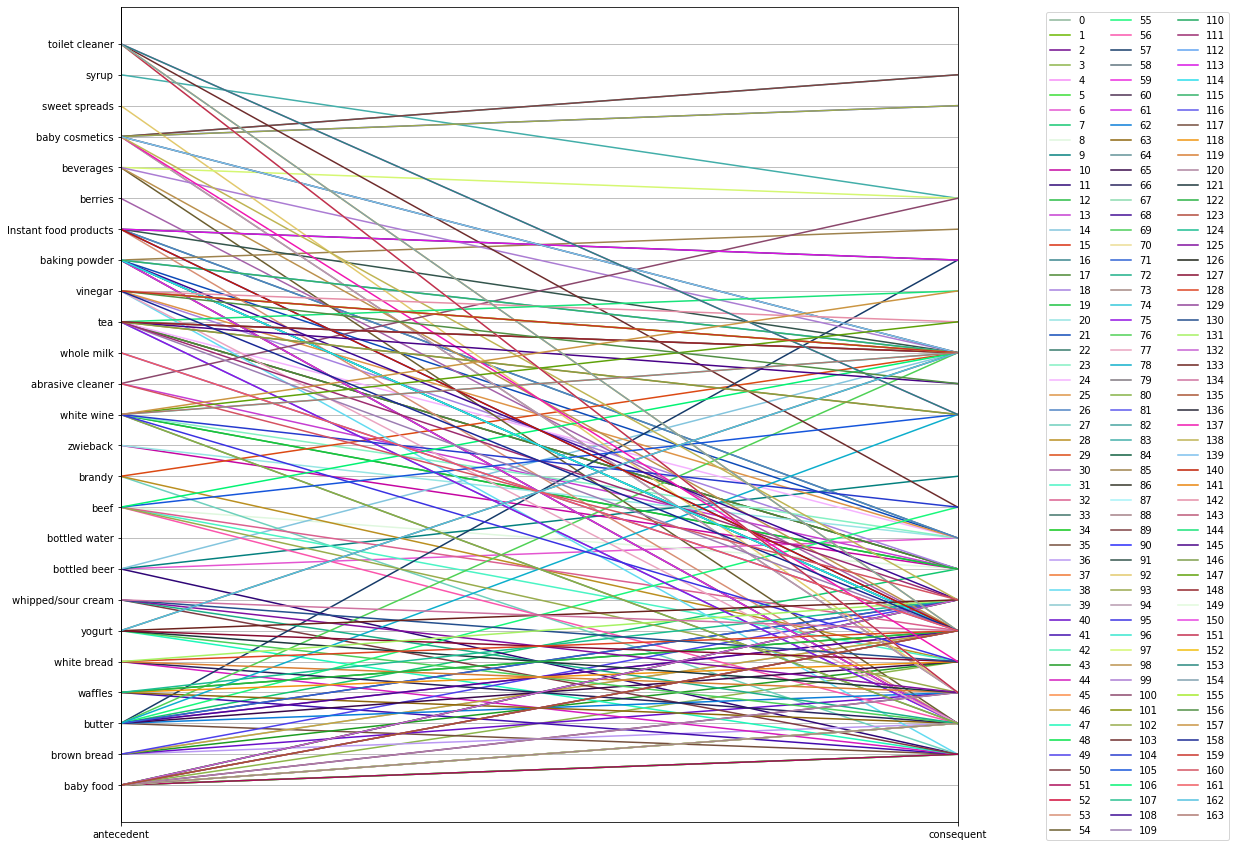

In [43]:
# %load solutions/exercise2-solution.py
fig, ax = plt.subplots()
parallel_coordinates(frame=coords, class_column='rule', ax=ax)
ax.legend(ncol=3, bbox_to_anchor=(1.1, 1))

#### Apriori Algorithm – Pros
* Easy to understand and implement
* Can use on large itemsets
#####  Apriori Algorithm – Cons
* At times, you need a large number of candidate rules. It can become computationally expensive.
* It is also an expensive method to calculate support because the calculation has to go through the entire database.
##### Apriori Algorithm – Limitations
* The process can sometimes be very tedious.
* How to Improve the Efficiency of the Apriori Algorithm?

#### Use the following methods to improve the efficiency of the apriori algorithm.

* Transaction Reduction – A transaction not containing any frequent k-itemset becomes useless in subsequent scans.
* Hash-based Itemset Counting – Exclude the k-itemset whose corresponding hashing bucket count is less than the threshold is an infrequent itemset.
* There are other methods as well such as partitioning, sampling, and dynamic itemset counting